In [30]:
import pandas as pd
import numpy as np

In [31]:
df=pd.read_csv("euro-daily-hist_1999_2022.csv")
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.463,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.528,1.452,NaN,NaN,37.263,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.332,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.549,1.4515,NaN,NaN,37.154,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.46,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.171,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.435,21.3993,1.0779,20.792
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.97,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.282,21.4629,1.0822,20.9137


In [32]:
df.rename(columns={'[Indian rupee ]':'Indian_rupee','Period\\Unit:':'Period'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period                    6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

In [33]:
new_df=df[['Period','Indian_rupee']]
new_df.head()

,Period,Indian_rupee
0,2023-05-26,88.8049
1,2023-05-25,88.8055
2,2023-05-24,89.1473
3,2023-05-23,89.2675
4,2023-05-22,89.671


In [34]:
new_df.shape

(6311, 2)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sn

In [36]:
new_df.isna().sum()

Period            0
Indian_rupee    268
dtype: int64

In [37]:
new_df.dropna(inplace=True)

/tmp/ipykernel_8406/1925939579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [38]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6043 entries, 0 to 6042
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Period        6043 non-null   object
 1   Indian_rupee  6043 non-null   object
dtypes: object(2)
memory usage: 141.6+ KB


In [39]:
new_df['Period']=pd.to_datetime(new_df['Period'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6043 entries, 0 to 6042
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Period        6043 non-null   datetime64[ns]
 1   Indian_rupee  6043 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 141.6+ KB


/tmp/ipykernel_8406/850449454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Period']=pd.to_datetime(new_df['Period'])


In [40]:
new_df[new_df['Indian_rupee']=='-']

,Period,Indian_rupee
2834,2012-05-01,-
2850,2012-04-09,-
2851,2012-04-06,-
2925,2011-12-26,-
3100,2011-04-25,-
...,...,...
5794,2000-12-26,-
5795,2000-12-25,-
5965,2000-05-01,-
5970,2000-04-24,-


In [41]:
new_df.drop(list(new_df[new_df['Indian_rupee']=='-'].index),axis=0,inplace=True)

/tmp/ipykernel_8406/1762920959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(list(new_df[new_df['Indian_rupee']=='-'].index),axis=0,inplace=True)


In [42]:
new_df.shape

(5982, 2)

In [43]:
ind_rupee=new_df.set_index('Period')
ind_rupee

,Indian_rupee
Period,
2023-05-26,88.8049
2023-05-25,88.8055
2023-05-24,89.1473
2023-05-23,89.2675
2023-05-22,89.671
...,...
2000-01-19,44.006
2000-01-18,43.998
2000-01-17,43.979


In [44]:
ind_rupee.sort_index(inplace=True)
ind_rupee

,Indian_rupee
Period,
2000-01-13,44.724
2000-01-14,44.473
2000-01-17,43.979
2000-01-18,43.998
2000-01-19,44.006
...,...
2023-05-22,89.671
2023-05-23,89.2675
2023-05-24,89.1473


In [45]:
ind_rupee['Indian_rupee']=pd.to_numeric(ind_rupee['Indian_rupee'])
ind_rupee.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5982 entries, 2000-01-13 to 2023-05-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Indian_rupee  5982 non-null   float64
dtypes: float64(1)
memory usage: 93.5 KB


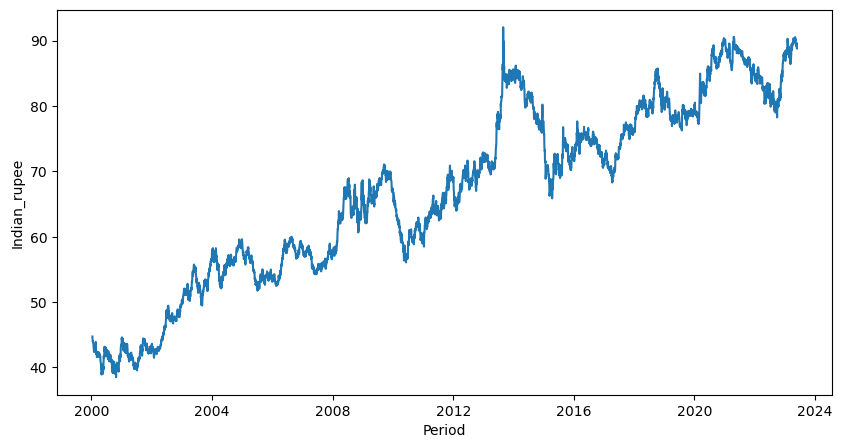

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(data=ind_rupee,x=ind_rupee.index,y=ind_rupee.Indian_rupee)
plt.show()

In [47]:
# Calculate and plot rolling mean and standard Deviation for 12 months

In [48]:
def stationarity_test(dataframe,var):
    dataframe['roll_mean']=dataframe[var].rolling(window=365).mean()
    dataframe['roll_std']=dataframe[var].rolling(window=365).std()
    from statsmodels.tsa.stattools import adfuller
    adfTest=adfuller(dataframe[var])
    stats=pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used',
                             'number of observations used'])
    print(stats)
    for key, values in adfTest[4].items():
        print('criticality ',key,":",values)
    plt.figure(figsize=(12,6))
    sns.lineplot(data=dataframe,x=dataframe.index,y=var)
    sns.lineplot(data=dataframe,x=dataframe.index,y='roll_mean')
    sns.lineplot(data=dataframe,x=dataframe.index,y='roll_std')
    if adfTest[1]<0.05:     
        
        return 1
    else:
        return 0
    

Test Statistic                   -1.156117
p-value                           0.692183
#lags used                       10.000000
number of observations used    5971.000000
dtype: float64
criticality  1% : -3.4314456478784714
criticality  5% : -2.8620241752163804
criticality  10% : -2.567027724073097
not stationary


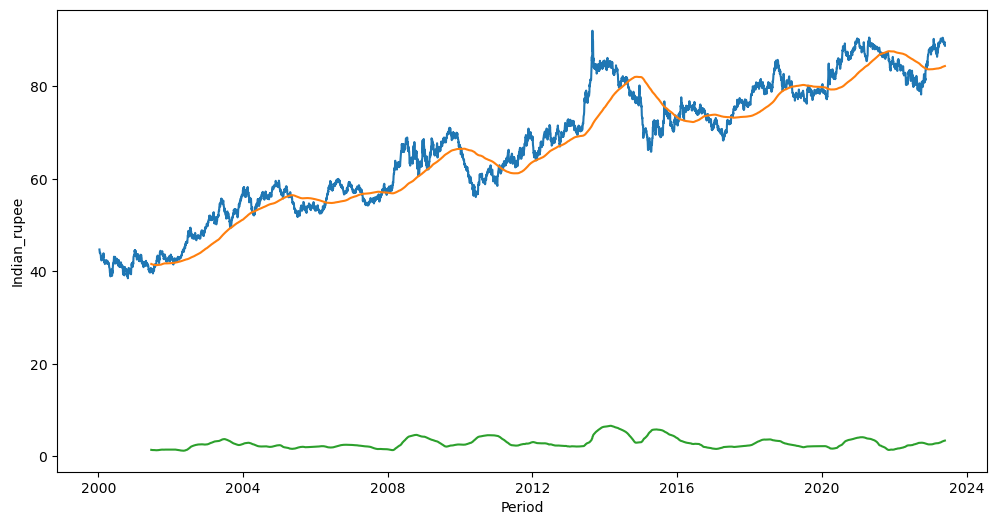

In [49]:
if stationarity_test(ind_rupee,'Indian_rupee'):
    print("Stationary")
else:
    print("not stationary")

In [50]:
# Our mean is not stationary but standard deviation is stationary, so our data is not stationary 

In [51]:
# To analyse Time-Series Analysis both rollmean and rolldeviation must same(stationary)

In [52]:
# Shift data to make rollmean and rolldeviation stationary

In [53]:
shift_ind_rupee=ind_rupee[['Indian_rupee']].copy()
shift_ind_rupee.head()

,Indian_rupee
Period,
2000-01-13,44.724
2000-01-14,44.473
2000-01-17,43.979
2000-01-18,43.998
2000-01-19,44.006


In [54]:
# We will see that our test statistic < Critical value in all the cases, so we do reject
# the Null Hypothesis(H0 - Data is not Stationary)
# It means our data is stationary
shift_ind_rupee.head(15)

,Indian_rupee
Period,
2000-01-13,44.724
2000-01-14,44.473
2000-01-17,43.979
2000-01-18,43.998
2000-01-19,44.006
2000-01-20,43.940
2000-01-21,43.968
2000-01-24,43.731
2000-01-25,43.630


/tmp/ipykernel_8406/3011200170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['roll_mean']=dataframe[var].rolling(window=365).mean()
/tmp/ipykernel_8406/3011200170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['roll_std']=dataframe[var].rolling(window=365).std()


Test Statistic                -1.210658e+01
p-value                        1.962618e-22
#lags used                     3.400000e+01
number of observations used    5.937000e+03
dtype: float64
criticality  1% : -3.4314519251486324
criticality  5% : -2.8620269486762244
criticality  10% : -2.5670292004605995
Stationary


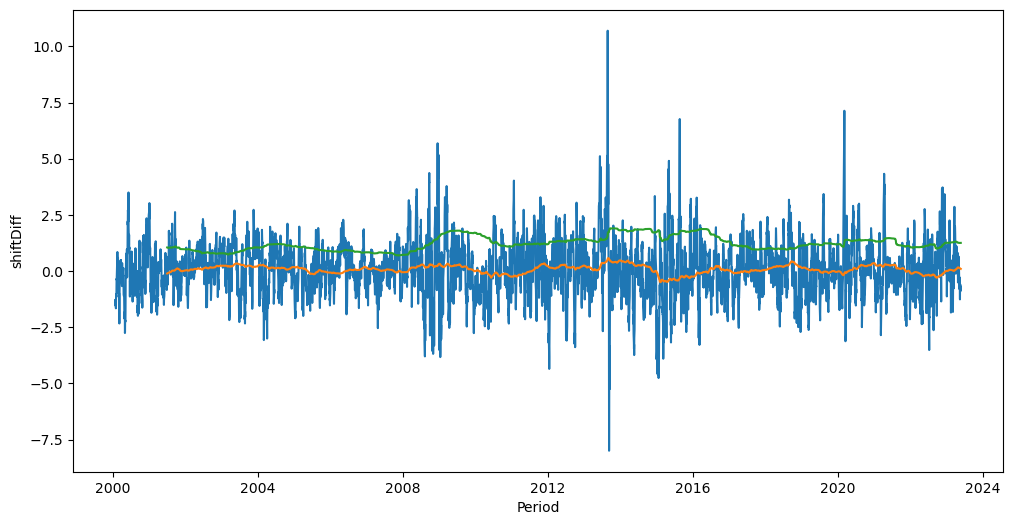

In [55]:
shift_ind_rupee['shift']=shift_ind_rupee['Indian_rupee'].shift(10)
shift_ind_rupee['shiftDiff']=shift_ind_rupee['Indian_rupee']-shift_ind_rupee['shift']
if stationarity_test(shift_ind_rupee.dropna(),'shiftDiff'):
    print("Stationary")
else:
    print("Not Stationary")

In [56]:
# ARIMA (Autoregressive Integrated Moving Average)
# ARIMA(p,d,q)
# p - Auto regressive (PACF Fn)
# d - Integreted (Shift)
# q - Moving Average (ACF Fn)
# Auto Correlation Function (ACF)
# Partially Auto Correlation Function (PACF)

In [57]:
shift_ind_rupee['shiftDiff']

Period
2000-01-13       NaN
2000-01-14       NaN
2000-01-17       NaN
2000-01-18       NaN
2000-01-19       NaN
               ...  
2023-05-22   -0.6065
2023-05-23   -0.6820
2023-05-24   -0.6712
2023-05-25   -0.8850
2023-05-26   -0.7151
Name: shiftDiff, Length: 5982, dtype: float64

In [58]:
# create columns for one month and one year lagged data
rupee_lag=shift_ind_rupee[['Indian_rupee']].copy(deep=True)
rupee_lag['firstDiff']=rupee_lag['Indian_rupee'].diff()
rupee_lag['Diff12']=rupee_lag['Indian_rupee'].diff(12) # Thiswill be used later in SARIMAX
print(rupee_lag.head())

            Indian_rupee  firstDiff  Diff12
Period                                     
2000-01-13        44.724        NaN     NaN
2000-01-14        44.473     -0.251     NaN
2000-01-17        43.979     -0.494     NaN
2000-01-18        43.998      0.019     NaN
2000-01-19        44.006      0.008     NaN


In [59]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

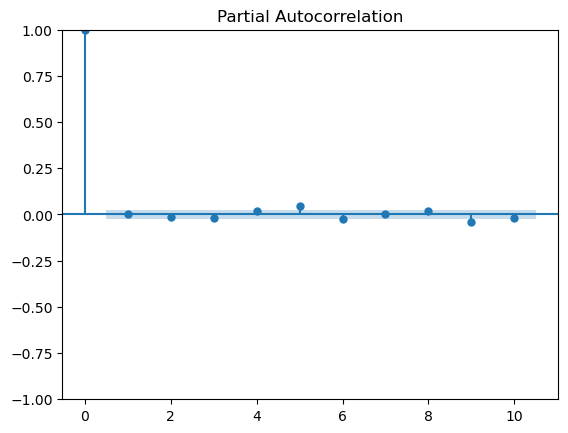

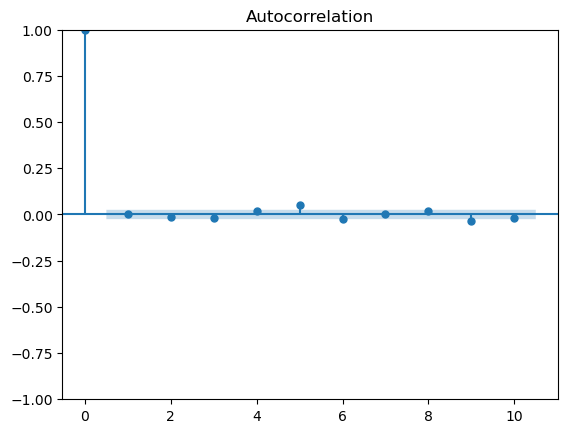

In [60]:
plot_pacf(rupee_lag['firstDiff'].dropna(),lags=10)
plt.show()
# Shaded area is insignificant area
# PACF gives us the auto regressive values (i.e. p)
# First 'p' is 1 (the x-axis coordinate) whose value is ~1(the y-axis coordinate)
# So significant p values are 1 etc

# Now let us take this value as p and find q, for which we need ACF
plot_acf(rupee_lag['firstDiff'].dropna(),lags=10)
plt.show()

In [125]:
# Results of ACF are similar to that of PACF
# Interpretation: We got q. Significant q values are 1,2,3, etc) 

# Let us take p = 1, q = 3 (both are significant) and d = 30 (already known)

In [136]:
train = rupee_lag[:round(len(rupee_lag)*70/100)] # Take the first 70% data
print(train.tail()) # Just to check where it ends

test = rupee_lag[round(len(rupee_lag)*70/100):] # Take the last 30% data, starting from 71%
print(test.head()) # Just to check where it starts


            Indian_rupee  firstDiff  Diff12
Period                                     
2016-05-19       75.5418    -0.0042 -0.0042
2016-05-20       75.6975     0.1557  0.1557
2016-05-23       75.7263     0.0288  0.0288
2016-05-24       75.5780    -0.1483 -0.1483
2016-05-25       75.1000    -0.4780 -0.4780
            Indian_rupee  firstDiff  Diff12
Period                                     
2016-05-26       74.9155    -0.1845 -0.1845
2016-05-27       74.8670    -0.0485 -0.0485
2016-05-30       74.7865    -0.0805 -0.0805
2016-05-31       74.9510     0.1645  0.1645
2016-06-01       75.3780     0.4270  0.4270


In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4187 entries, 2000-01-13 to 2016-05-25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Indian_rupee  4187 non-null   float64
 1   firstDiff     4186 non-null   float64
 2   Diff12        4186 non-null   float64
dtypes: float64(3)
memory usage: 130.8+ KB


In [138]:
# Build ARIMA model

model = ARIMA(train['Indian_rupee'],order=(1,0,1)) # Parameters: p, d, q
model_fit = model.fit()

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [139]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Indian_rupee   No. Observations:                 4187
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2219.158
Date:                Mon, 23 Oct 2023   AIC                           4446.315
Time:                        16:36:18   BIC                           4471.674
Sample:                             0   HQIC                          4455.283
                               - 4187                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.5081      6.065      9.976      0.000      48.620      72.396
ar.L1          0.9993      0.000   2149.987      0.000       0.998       1.000
ma.L1         -0.0010      0.009     -0.114      0.910      -0.019       0.017
sigma2         0.1687      0.002     88.672      0.000       0.165       0.172
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5380.75
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.32   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
#prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
prediction = model_fit.predict(start=0,end=1794)

In [191]:
rupee_lag['arimaPred'] = prediction
print(rupee_lag.tail(6000))

            Indian_rupee  firstDiff  Diff12  arimaPred
Period                                                
2000-01-13       44.7240        NaN     NaN        NaN
2000-01-14       44.4730    -0.2510 -0.2510  44.734713
2000-01-17       43.9790    -0.4940 -0.4940  44.484131
2000-01-18       43.9980     0.0190  0.0190  43.990718
2000-01-19       44.0060     0.0080  0.0080  44.009175
...                  ...        ...     ...        ...
2023-05-22       89.6710     0.2495  0.2495        NaN
2023-05-23       89.2675    -0.4035 -0.4035        NaN
2023-05-24       89.1473    -0.1202 -0.1202        NaN
2023-05-25       88.8055    -0.3418 -0.3418        NaN
2023-05-26       88.8049    -0.0006 -0.0006        NaN

[5982 rows x 4 columns]


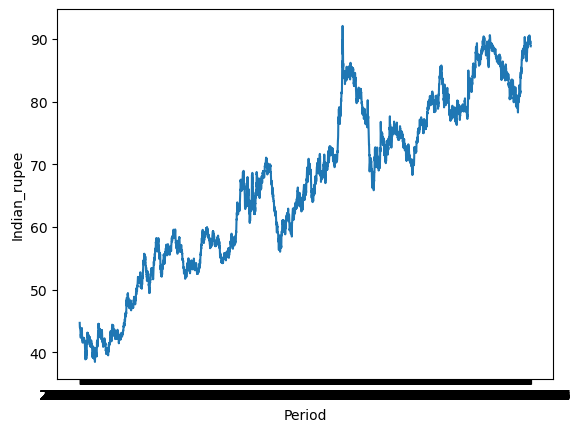

In [183]:
sns.lineplot(data=rupee_lag,x=rupee_lag.index,y='Indian_rupee')

plt.show()

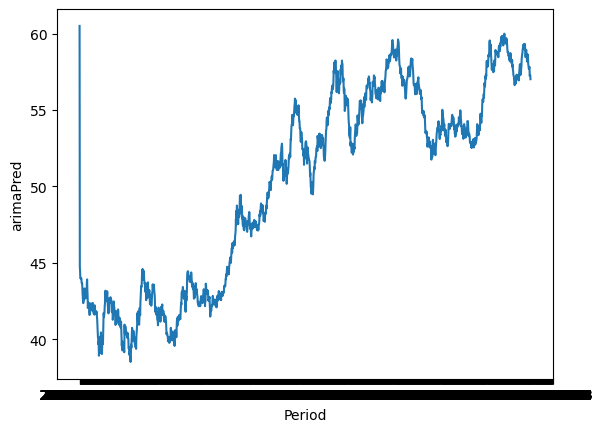

In [184]:
sns.lineplot(data=rupee_lag,x=rupee_lag.index,y='arimaPred')
plt.show()

In [237]:
# Conclusion: The ARIMA prediction is good

In [173]:
!pip install pmdarima

In [185]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(ind_rupee.Indian_rupee, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6083.379, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48445.232, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=40391.978, Time=1.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67481.586, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6084.560, Time=6.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6084.205, Time=1.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=33540.313, Time=3.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6086.281, Time=1.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6084.270, Time=2.14 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 17.451 seconds


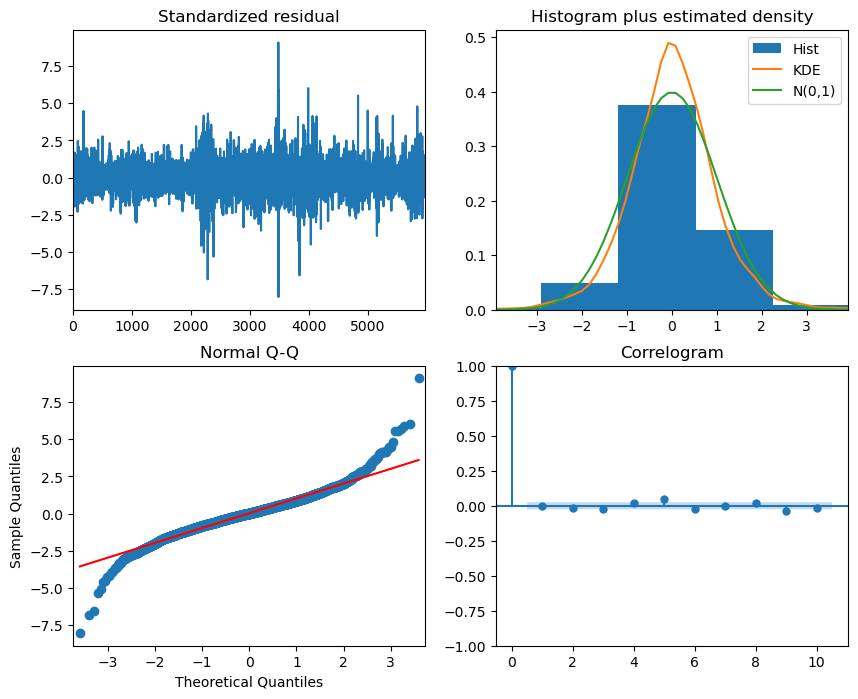

In [186]:


model.plot_diagnostics(figsize=(10,8))
plt.show()



/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


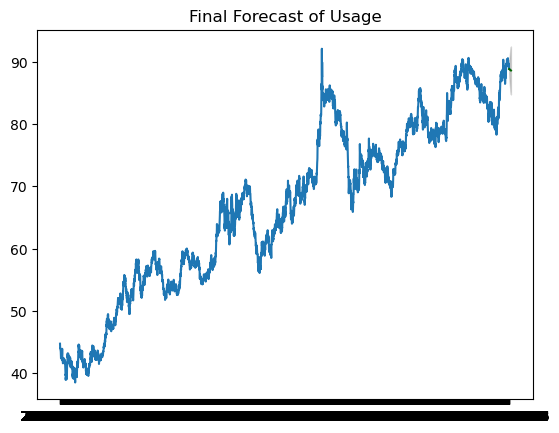

In [187]:


# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(ind_rupee.Indian_rupee), len(ind_rupee.Indian_rupee)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(ind_rupee.Indian_rupee)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

